In [ ]:
!pip install tflite-model-maker

     |████████████████████████████████| 593kB 4.0MB/s 
     |████████████████████████████████| 849kB 21.1MB/s 
     |████████████████████████████████| 686kB 35.0MB/s 
     |████████████████████████████████| 6.3MB 40.6MB/s 
     |████████████████████████████████| 122kB 43.6MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
     |████████████████████████████████| 174kB 35.0MB/s 
     |████████████████████████████████| 1.1MB 39.5MB/s 
     |████████████████████████████████| 112kB 36.4MB/s 
     |████████████████████████████████| 645kB 33.9MB/s 
     |████████████████████████████████| 1.2MB 32.2MB/s 
     |████████████████████████████████| 92kB 8.2MB/s 
     |████████████████████████████████| 358kB 23.1MB/s 
     |████████████████████████████████| 102kB 9.3MB/s 
     |████████████████████████████████| 38.2MB 94kB/s 
     |████████████████████████████████| 194kB 43.1MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=df332face057083401407089c

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = DataLoader.from_folder('/content/drive/MyDrive/Bangkit_Project/Batik/train')

INFO:tensorflow:Load image with size: 2000, num_label: 20, labels: batik-bali, batik-betawi, batik-celup, batik-cendrawasih, batik-ceplok, batik-ciamis, batik-garutan, batik-gentongan, batik-kawung, batik-keraton, batik-lasem, batik-megamendung, batik-parang, batik-pekalongan, batik-priangan, batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, batik-tambal.


In [ ]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

In [ ]:
train_data = DataLoader.from_folder ('/content/drive/MyDrive/Bangkit_Project/Batik/train')
test_data =  DataLoader.from_folder ('/content/drive/MyDrive/Bangkit_Project/Batik/test')

INFO:tensorflow:Load image with size: 2000, num_label: 20, labels: batik-bali, batik-betawi, batik-celup, batik-cendrawasih, batik-ceplok, batik-ciamis, batik-garutan, batik-gentongan, batik-kawung, batik-keraton, batik-lasem, batik-megamendung, batik-parang, batik-pekalongan, batik-priangan, batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, batik-tambal.
INFO:tensorflow:Load image with size: 953, num_label: 20, labels: batik-bali, batik-betawi, batik-celup, batik-cendrawasih, batik-ceplok, batik-ciamis, batik-garutan, batik-gentongan, batik-kawung, batik-keraton, batik-lasem, batik-megamendung, batik-parang, batik-pekalongan, batik-priangan, batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, batik-tambal.


In [ ]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                25620     
Total params: 3,438,644
Trainable params: 25,620
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
62/62 [==============================] - 274s 4s/step - loss: 2.6277 - accuracy: 0.2651
Epoch 2/5
62/62 [==============================] - 72s 1s/step - loss: 1.9019 - accuracy: 0.5393
Epoch 3/5
62/62 [==============================] - 70s 1s/step - loss: 1.6942 - accuracy: 0.6205
Epoch 4/5
62/62 [==============================] - 71s 1s/step - loss: 1.5494 - accuracy: 0.6769
Epoch 5/5
62/62 [==============================] - 69s 1s/step - loss: 1.4508 - accuracy: 0.7188


In [ ]:
loss, accuracy = model.evaluate(test_data)

30/30 [==============================] - 143s 5s/step - loss: 1.7383 - accuracy: 0.6128


In [ ]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpia0cnudj/assets


INFO:tensorflow:Assets written to: /tmp/tmpia0cnudj/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmptv4j5xtq/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmptv4j5xtq/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [ ]:
train_data= ('/content/drive/MyDrive/Bangkit_Project/Batik/train')
test_data = ('/content/drive/MyDrive/Bangkit_Project/Batik/test')

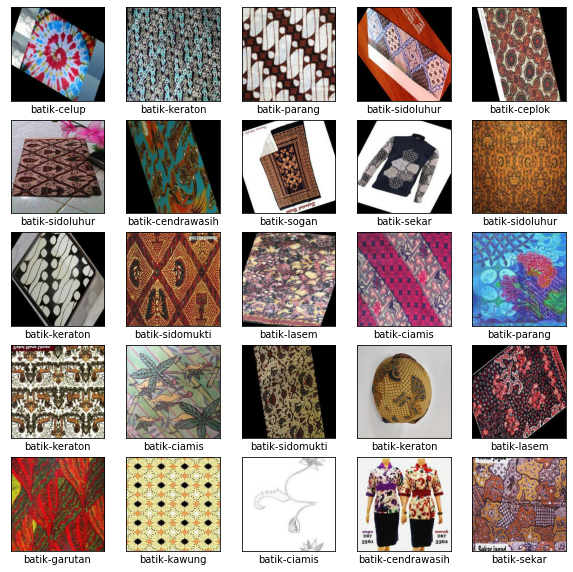

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
train_data = DataLoader.from_folder('/content/drive/MyDrive/Bangkit_Project/Batik/train')
test_data = DataLoader.from_folder('/content/drive/MyDrive/Bangkit_Project/Batik/test')

INFO:tensorflow:Load image with size: 2000, num_label: 20, labels: batik-bali, batik-betawi, batik-celup, batik-cendrawasih, batik-ceplok, batik-ciamis, batik-garutan, batik-gentongan, batik-kawung, batik-keraton, batik-lasem, batik-megamendung, batik-parang, batik-pekalongan, batik-priangan, batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, batik-tambal.


INFO:tensorflow:Load image with size: 2000, num_label: 20, labels: batik-bali, batik-betawi, batik-celup, batik-cendrawasih, batik-ceplok, batik-ciamis, batik-garutan, batik-gentongan, batik-kawung, batik-keraton, batik-lasem, batik-megamendung, batik-parang, batik-pekalongan, batik-priangan, batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, batik-tambal.


INFO:tensorflow:Load image with size: 953, num_label: 20, labels: batik-bali, batik-betawi, batik-celup, batik-cendrawasih, batik-ceplok, batik-ciamis, batik-garutan, batik-gentongan, batik-kawung, batik-keraton, batik-lasem, batik-megamendung, batik-parang, batik-pekalongan, batik-priangan, batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, batik-tambal.


INFO:tensorflow:Load image with size: 953, num_label: 20, labels: batik-bali, batik-betawi, batik-celup, batik-cendrawasih, batik-ceplok, batik-ciamis, batik-garutan, batik-gentongan, batik-kawung, batik-keraton, batik-lasem, batik-megamendung, batik-parang, batik-pekalongan, batik-priangan, batik-sekar, batik-sidoluhur, batik-sidomukti, batik-sogan, batik-tambal.


In [ ]:
loss, accuracy = model.evaluate(test_data)

30/30 [==============================] - 34s 1s/step - loss: 1.7383 - accuracy: 0.6128


In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='.')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                25620     
Total params: 3,438,644
Trainable params: 25,620
Non-trainable params: 3,413,024
_________________________________________________________________


In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(10, 10))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(50)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='/content/drive/MyDrive/Bangkit_Project')

INFO:tensorflow:Assets written to: /tmp/tmpr4gkz_7z/assets


INFO:tensorflow:Assets written to: /tmp/tmpr4gkz_7z/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpe395wiue/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpe395wiue/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Bangkit_Project/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Bangkit_Project/model.tflite


In [ ]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


In [ ]:
model.evaluate_tflite('model.tflite', test_data)

{'accuracy': 0.6180482686253935}

In [ ]:
config = QuantizationConfig.for_float16()

In [ ]:
model.export(export_dir='/content/drive/MyDrive/Bangkit_Project/Batik', tflite_filename='model_fp16.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmph38fe08p/assets


INFO:tensorflow:Assets written to: /tmp/tmph38fe08p/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpu1km2uds/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpu1km2uds/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Bangkit_Project/Batik/model_fp16.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Bangkit_Project/Batik/model_fp16.tflite
